<hr>
<font color = blue>
    Initial Program
    <ul>
        <li> Importing the relevant dependencies/libraries and read the raw train.csv file
    </ul>
</font>
<hr>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
def fn_write_msg(*args):
    msg = args[0]
    output = ''  
    print("\n", "-" * 60)
    print('====> ', msg)
    print("-" * 60)
    
    if len(args) == 2:
        output = args[1]
        print(output)
    print("\n")

In [3]:
pd_house = pd.read_csv("train.csv")
pd_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
fn_write_msg("Displaying dataframe shape: ")
print(pd_house.shape)


 ------------------------------------------------------------
====>  Displaying dataframe shape: 
------------------------------------------------------------


(1460, 81)


In [5]:
fn_write_msg("Displaying Column Info: ")
pd_house.info()


 ------------------------------------------------------------
====>  Displaying Column Info: 
------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-nu

In [6]:
pd_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Initial Data Cleansing 

In [7]:
## Dropping unwanted columns
pd_house_clean = pd_house.copy()
unwanted_col_list = ['Id']
fn_write_msg(f"Drop unwanted columns")
for column in unwanted_col_list:
    del pd_house_clean[column]
    print(f"====> Dropped column: {column}")    


 ------------------------------------------------------------
====>  Drop unwanted columns
------------------------------------------------------------


====> Dropped column: Id


In [8]:
## Dropping Columns with high proportion of Null/NA Values
row_count = pd_house_clean.shape[0]
col_drop_threshold_pct = 40

for column, datatype in zip(pd_house_clean.columns, pd_house_clean.dtypes):
    null_count = pd_house_clean[[column]].isnull().sum()[0]
    null_percentage = null_count/row_count * 100
    if null_percentage >= col_drop_threshold_pct:
        print(f"Dropping column {column} with null percentage {null_percentage}")
        del pd_house_clean[column]
fn_write_msg(f"Shape pd_house_clean: {pd_house_clean.shape}")

Dropping column Alley with null percentage 93.76712328767123
Dropping column FireplaceQu with null percentage 47.26027397260274
Dropping column PoolQC with null percentage 99.52054794520548
Dropping column Fence with null percentage 80.75342465753424
Dropping column MiscFeature with null percentage 96.30136986301369

 ------------------------------------------------------------
====>  Shape pd_house_clean: (1460, 75)
------------------------------------------------------------




In [9]:
## Null handling of Numeric Columns with Null values as per Data Dictionary definitions
col_with_nulls = pd.isnull(pd_house_clean).sum()[pd.isnull(pd_house_clean).sum() > 0] #pd_house_clean.columns[pd_house_clean.isnull().any()].tolist()
fn_write_msg("List of ALL columns with Null Values along with counts:", col_with_nulls)

## Based on data, list of Null columns are split into string and numerical column lists below:
num_null_list = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
str_null_list = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

print(f"====> Numeric columns with Null Values: {num_null_list} \n")
print(f"====> String columns with Null Values: {str_null_list} \n")


 ------------------------------------------------------------
====>  List of ALL columns with Null Values along with counts:
------------------------------------------------------------
LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


====> Numeric columns with Null Values: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'] 

====> String columns with Null Values: ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'] 




 ------------------------------------------------------------
====>  Box Plot for Column: LotFrontage
------------------------------------------------------------




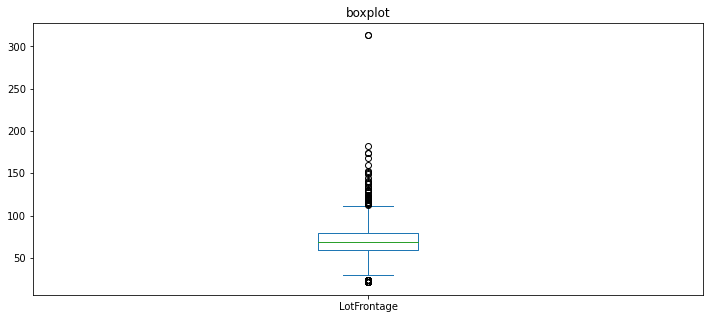

====> Outlier upper limit for Column [LotFrontage] : 111.5
====> Outlier lower limit for Column [LotFrontage] : 27.5
====> Outlier Count for Column [LotFrontage] : 88

 ------------------------------------------------------------
====>  Box Plot for Column: MasVnrArea
------------------------------------------------------------




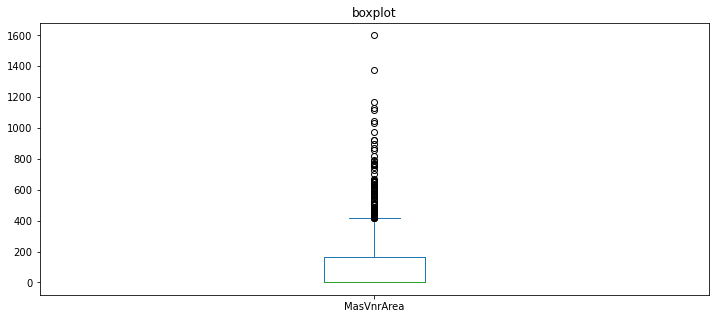

====> Outlier upper limit for Column [MasVnrArea] : 415.0
====> Outlier lower limit for Column [MasVnrArea] : -249.0
====> Outlier Count for Column [MasVnrArea] : 96

 ------------------------------------------------------------
====>  Box Plot for Column: GarageYrBlt
------------------------------------------------------------




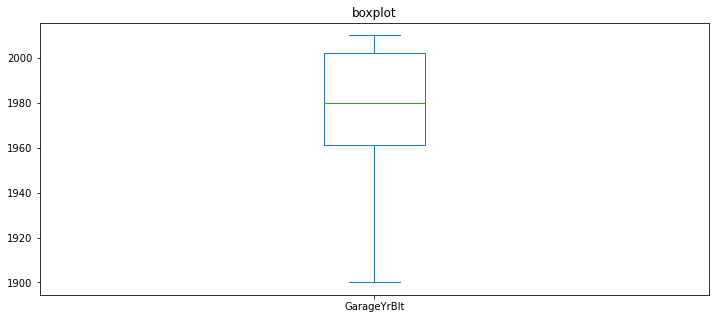

====> Outlier upper limit for Column [GarageYrBlt] : 2063.5
====> Outlier lower limit for Column [GarageYrBlt] : 1899.5
====> Outlier Count for Column [GarageYrBlt] : 0


In [10]:
## Check Box and distribution Plots for Numeric columns to identify outliers

for column in num_null_list:
    fn_write_msg(f"Box Plot for Column: {column}")
    ax = pd_house_clean[column].plot(kind='box', title='boxplot', figsize=(12,5))
    plt.show()
    
    outlier_limit = pd_house_clean[column].quantile(1)
    Q1 = pd_house_clean[column].quantile(0.25)
    Q3 = pd_house_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = pd_house_clean[column][((pd_house_clean[column]<(Q1 - 1.5 * IQR)) | (pd_house_clean[column]>(Q3 + 1.5 * IQR)))]
    
    outlier_count = pd_house_clean[column][pd_house_clean[column] >= pd_house_clean[column].quantile(0.75)].count()
    # print(f"====> Summary information for [{column}] : {pd_house_clean.describe()}")
    print(f"====> Outlier upper limit for Column [{column}] : {Q3 + 1.5 * IQR}")
    print(f"====> Outlier lower limit for Column [{column}] : {Q1 - 1.5 * IQR}")
    print(f"====> Outlier Count for Column [{column}] : {outliers.count()}")


In [11]:
## Handle numeric columns having NULL values as well as outliers

## Since LotFrontage and MasVnrArea have outliers, impute Null values with median
pd_house_clean['LotFrontage']= pd_house_clean['LotFrontage'].fillna(pd_house_clean['LotFrontage'].median())
pd_house_clean['MasVnrArea']= pd_house_clean['MasVnrArea'].fillna(pd_house_clean['MasVnrArea'].median())

## GarageYrBlt has no outliers, impute null values with mean
pd_house_clean['GarageYrBlt']= pd_house_clean['GarageYrBlt'].fillna(pd_house_clean['GarageYrBlt'].mean())

fn_write_msg("Verify Null Values in updated dataset numeric columns")
for column in num_null_list:
    print(f"Count of Null values for colum {column}: {pd_house_clean[column].isna().sum()}")


 ------------------------------------------------------------
====>  Verify Null Values in updated dataset numeric columns
------------------------------------------------------------


Count of Null values for colum LotFrontage: 0
Count of Null values for colum MasVnrArea: 0
Count of Null values for colum GarageYrBlt: 0


In [12]:
# For String Columns, update the NULL values to a string value 'None'

for column in str_null_list:
    pd_house_clean[column].fillna('None', inplace=True)

fn_write_msg("Verify Null Values in updated dataset for string columns")
for column in str_null_list:
    print(f"Count of Null values for colum {column}: {pd_house_clean[column].isna().sum()}")


 ------------------------------------------------------------
====>  Verify Null Values in updated dataset for string columns
------------------------------------------------------------


Count of Null values for colum MasVnrType: 0
Count of Null values for colum BsmtQual: 0
Count of Null values for colum BsmtCond: 0
Count of Null values for colum BsmtExposure: 0
Count of Null values for colum BsmtFinType1: 0
Count of Null values for colum BsmtFinType2: 0
Count of Null values for colum Electrical: 0
Count of Null values for colum GarageType: 0
Count of Null values for colum GarageFinish: 0
Count of Null values for colum GarageQual: 0
Count of Null values for colum GarageCond: 0


## ==== NOTE ====
<hr>
<font color = blue >
    <ul>
        <li>  Dropped unwanted column ID
        <li>  Dropped the columns Alley, FireplaceQu, PoolQC, Fence, MiscFeature as hey have high percentage of NA/NULL values
        <li>  Note the value NA has business significance for all the above columns but the proportion of this value is too high. A threshold of 80% was assumed to identify and drop such columns
        <li>  Null values for 'LotFrontage', 'MasVnrArea' were imputed with median as there were outliers and Null values for GarageYrBlt were imputed with mean
        <li>  Null values for MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond were imputed with 'None'
    </ul>
</font>
</hr>

## CATEGORICAL/CONTINUOUS COLUMN ANALYSIS


In [13]:
fn_write_msg("View Distinct Values to detemine Categorical/Continuous Columns")
msg_cont_list = []
msg_cat_list = []
cont_list = []
cat_list = []
for col in pd_house_clean.columns:
    unique_col = set(pd_house_clean[col])
    if len(unique_col) <= 25:
        msg_cat_list.append(f"Column '{col}' is Categorical with {len(unique_col)} unique values: [{unique_col}]")
        cat_list.append(col)
    else:
        msg_cont_list.append(f"Column '{col}' is Continuous with Count of unique values: [{len(unique_col)}]")
        cont_list.append(col)
print("\n".join(msg_cat_list), '\n')
print("\n".join(msg_cont_list), '\n')


 ------------------------------------------------------------
====>  View Distinct Values to detemine Categorical/Continuous Columns
------------------------------------------------------------


Column 'MSSubClass' is Categorical with 15 unique values: [{160, 70, 40, 75, 45, 80, 50, 20, 85, 180, 30, 120, 90, 60, 190}]
Column 'MSZoning' is Categorical with 5 unique values: [{'RL', 'C (all)', 'RM', 'RH', 'FV'}]
Column 'Street' is Categorical with 2 unique values: [{'Pave', 'Grvl'}]
Column 'LotShape' is Categorical with 4 unique values: [{'IR1', 'Reg', 'IR3', 'IR2'}]
Column 'LandContour' is Categorical with 4 unique values: [{'Low', 'Lvl', 'Bnk', 'HLS'}]
Column 'Utilities' is Categorical with 2 unique values: [{'NoSeWa', 'AllPub'}]
Column 'LotConfig' is Categorical with 5 unique values: [{'CulDSac', 'FR2', 'Corner', 'FR3', 'Inside'}]
Column 'LandSlope' is Categorical with 3 unique values: [{'Gtl', 'Sev', 'Mod'}]
Column 'Neighborhood' is Categorical with 25 unique values: [{'ClearCr', 'S

In [14]:
fn_write_msg("Print Continuous and Categorical columns as a list")
print(f"====> Categorical Column List [len(cat_list): {len(cat_list)}]: {cat_list}", '\n')
print(f"====> Continuous Column List [len(cont_list): {len(cont_list)}]: {cont_list}")


 ------------------------------------------------------------
====>  Print Continuous and Categorical columns as a list
------------------------------------------------------------


====> Categorical Column List [len(cat_list): 56]: ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleConditi


 ------------------------------------------------------------
====>  Pie Plot Analysis of Categorical Columns
------------------------------------------------------------




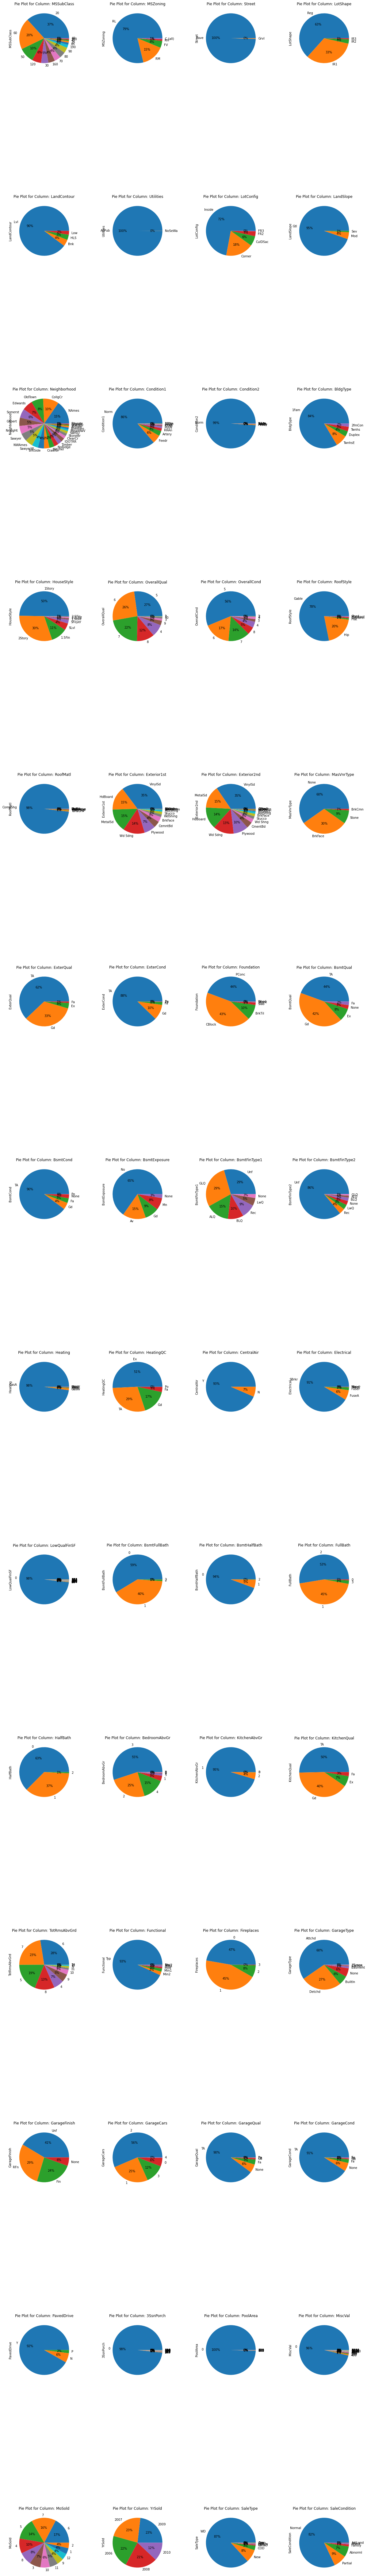

In [15]:
fn_write_msg("Pie Plot Analysis of Categorical Columns")
# Define pie plot function to loop through list of columns
def fn_pie_plot(df, col_list, ncol):
    list_len = len(col_list)

    fig, axes = plt.subplots(list_len//ncol, ncol, figsize=(20,80))

    for column, index in zip(col_list, range(len(col_list))):     
        ax = df[column].value_counts().plot.pie(autopct = "%1.0f%%", ax=axes[index//ncol,index%ncol])
        ax.title.set_text(f"Pie Plot for Column: {column}")
        axes[index//ncol,index%ncol].tick_params(axis='x', rotation=90) 

    plt.subplots_adjust(top = 1.5, bottom=0.01, hspace=.5, wspace=0.5)
    plt.show()

cat_col_list = []
fn_pie_plot(pd_house_clean, cat_list , 4)
plt.show()

In [16]:
fn_write_msg("Dropping heavily skewed attributes [ > 90%]")
# drop_skew_cols = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolArea']
drop_skew_cols = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'LowQualFinSF', 
                  'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'PavedDrive', '3SsnPorch', 'PoolArea']

pd_house_clean_1 = pd_house_clean.copy()
for column in drop_skew_cols:
    del pd_house_clean_1[column]
    cat_list.remove(column)
    print(f"====> Dropped column: {column}")  


 ------------------------------------------------------------
====>  Dropping heavily skewed attributes [ > 90%]
------------------------------------------------------------


====> Dropped column: Street
====> Dropped column: Utilities
====> Dropped column: Condition2
====> Dropped column: RoofMatl
====> Dropped column: Heating
====> Dropped column: CentralAir
====> Dropped column: LowQualFinSF
====> Dropped column: BsmtHalfBath
====> Dropped column: KitchenAbvGr
====> Dropped column: Functional
====> Dropped column: PavedDrive
====> Dropped column: 3SsnPorch
====> Dropped column: PoolArea



 ------------------------------------------------------------
====>  Plot Heatmap to see correlation between variables
------------------------------------------------------------




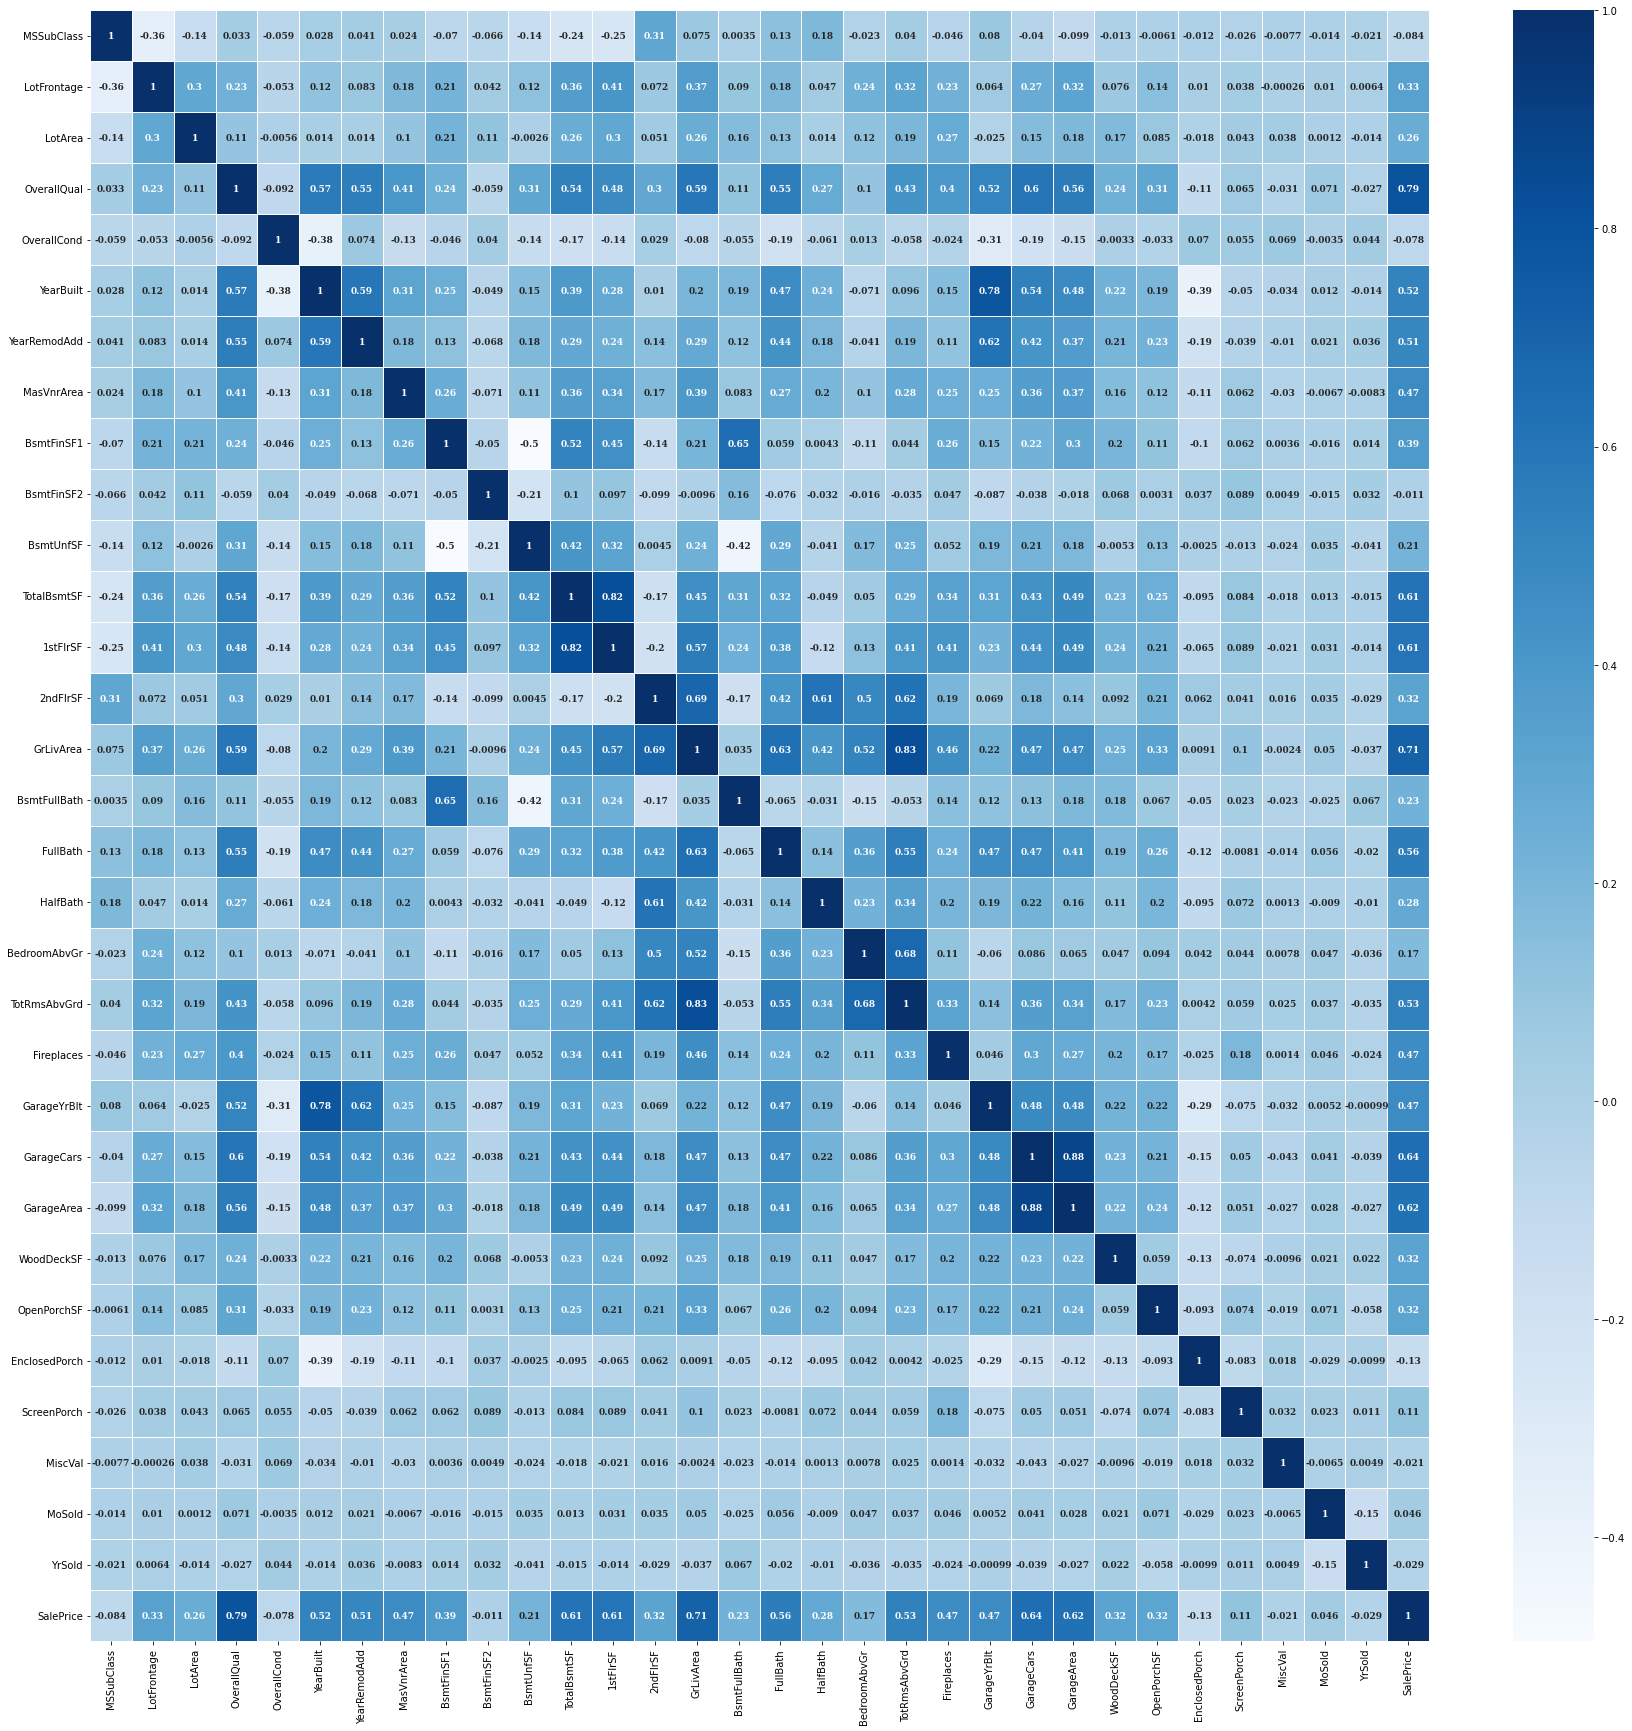

In [17]:
fn_write_msg("Plot Heatmap to see correlation between variables")
plt.figure(figsize=(30, 30))
sns.heatmap(pd_house_clean_1.corr(), annot=True, linewidths=1, cmap='Blues', 
            annot_kws={
                'fontsize': 9,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
plt.show()


 ------------------------------------------------------------
====>  Re-Plot Heatmap to see correlation between some highly correlated variables
------------------------------------------------------------




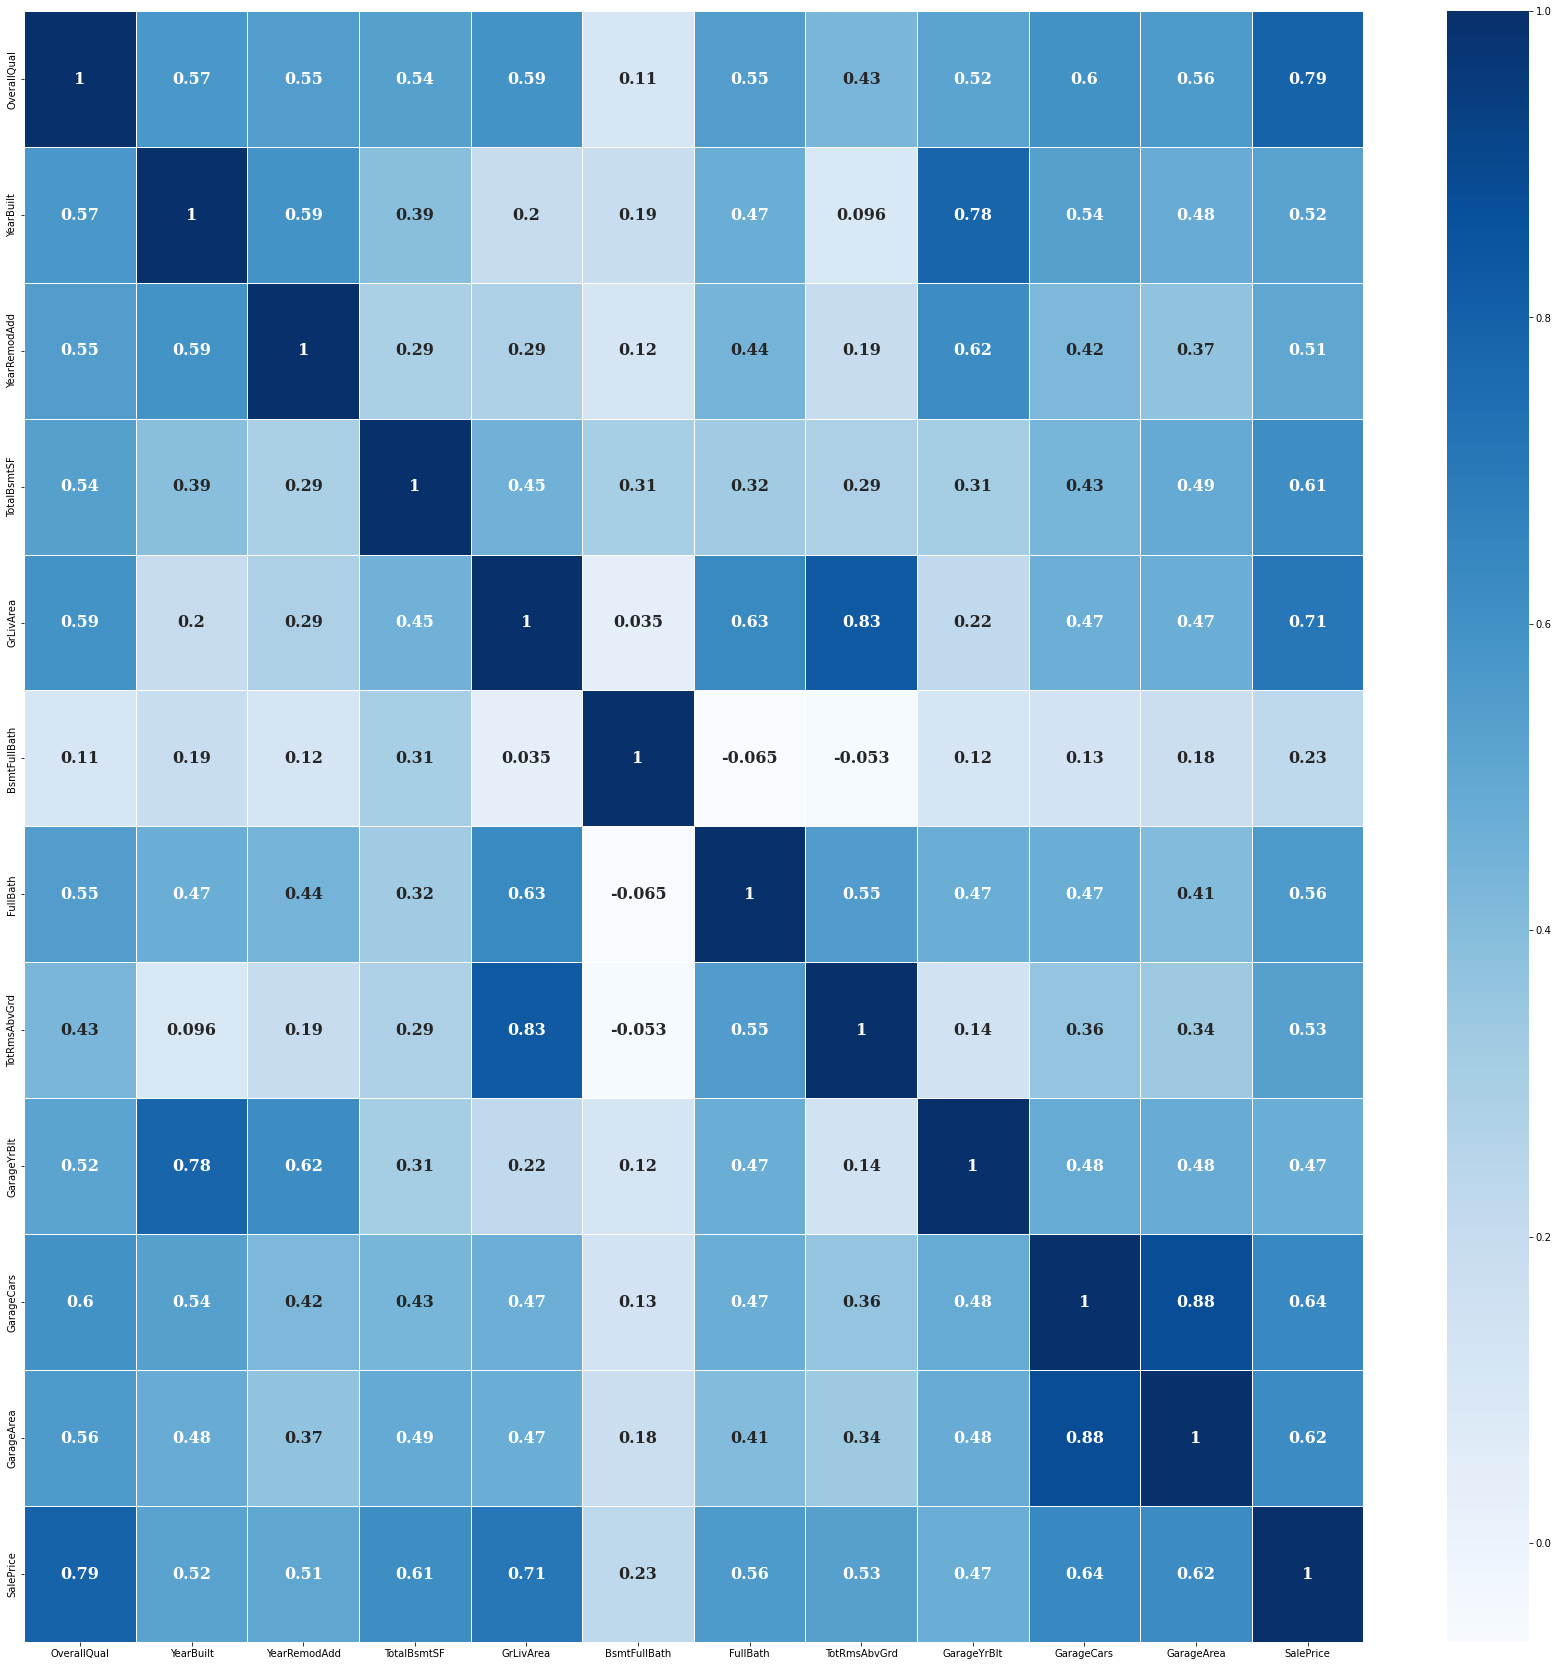

In [18]:
fn_write_msg("Re-Plot Heatmap to see correlation between some highly correlated variables")

high_corr_cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 
'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']

plt.figure(figsize=(30, 30))
sns.heatmap(pd_house_clean_1[high_corr_cols].corr(), annot=True, linewidths=1, cmap='Blues', 
            annot_kws={
                'fontsize': 16,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
plt.show()


 ------------------------------------------------------------
====>  Histogram of all Numeric Variables
------------------------------------------------------------




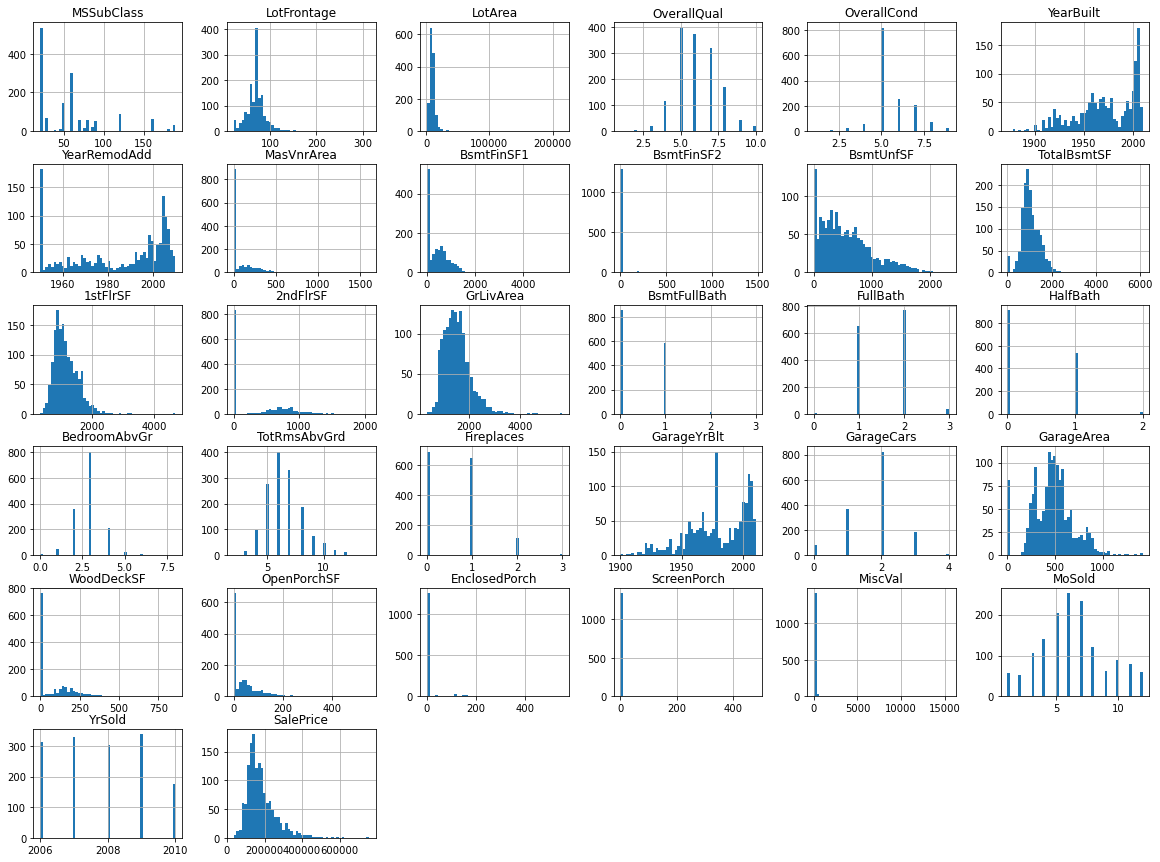

In [19]:
fn_write_msg("Histogram of all Numeric Variables")
pd_house_clean_1.hist(bins=50, figsize=(20, 15))
plt.show()

## ==== NOTE ====
<hr>
<font color = blue >
    <ul>
        <li> The columns 'Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', '3SsnPorch', 'PoolArea' were dropped due to high skew ( >= 98% )
        <li> Heatmap indicates that the columns 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', , 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea' have a high correlation with the Target Variable
        <li>
        <li>
    </ul>
</font>
</hr>

## DUMMY ENCODING OF CATEGORIAL VARIABLES

In [20]:
fn_write_msg("One Hot Encoding of applicable categorical columns")

pd_house_encode = pd_house_clean_1.copy()

for column in cat_list:
    pd_house_encode = pd.concat(
        [pd_house_encode, pd.get_dummies(pd_house_encode[column], prefix=column,  drop_first=True)], axis = 1
    ).drop(columns=column)

pd_house_encode.info(verbose=True)


 ------------------------------------------------------------
====>  One Hot Encoding of applicable categorical columns
------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 294 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    LotFrontage            float64
 1    LotArea                int64  
 2    YearBuilt              int64  
 3    YearRemodAdd           int64  
 4    MasVnrArea             float64
 5    BsmtFinSF1             int64  
 6    BsmtFinSF2             int64  
 7    BsmtUnfSF              int64  
 8    TotalBsmtSF            int64  
 9    1stFlrSF               int64  
 10   2ndFlrSF               int64  
 11   GrLivArea              int64  
 12   GarageYrBlt            float64
 13   GarageArea             int64  
 14   WoodDeckSF             int64  
 15   OpenPorchSF            int64  
 16   EnclosedPorch          int64  
 17  

In [21]:
fn_write_msg("Printing pd_house_encode post categorical column encoding")
print("====> pd_house_encode shape: ", pd_house_encode.shape)
pd_house_encode.head(10)


 ------------------------------------------------------------
====>  Printing pd_house_encode post categorical column encoding
------------------------------------------------------------


====> pd_house_encode shape:  (1460, 294)


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0
5,85.0,14115,1993,1995,0.0,732,0,64,796,796,...,0,0,0,0,1,0,0,0,1,0
6,75.0,10084,2004,2005,186.0,1369,0,317,1686,1694,...,0,0,0,0,1,0,0,0,1,0
7,69.0,10382,1973,1973,240.0,859,32,216,1107,1107,...,0,0,0,0,1,0,0,0,1,0
8,51.0,6120,1931,1950,0.0,0,0,952,952,1022,...,0,0,0,0,1,0,0,0,0,0
9,50.0,7420,1939,1950,0.0,851,0,140,991,1077,...,0,0,0,0,1,0,0,0,1,0


## DIVIDE DATA INTO TRAINING AND TEST SETS

In [22]:
fn_write_msg("Splitting the Final Dataset into Training (70%) and Test(30%) datasets ")
X_train, X_test, y_train, y_test = train_test_split(
    pd_house_encode.drop(['SalePrice'], axis=1), pd_house_encode['SalePrice'], train_size=0.7, test_size = 0.3, random_state=100)


#y_train = np.array(y_train).reshape(-1,1)
#y_test = np.array(y_test).reshape(-1,1)

print("X_train shape: ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape : ", y_test.shape)


 ------------------------------------------------------------
====>  Splitting the Final Dataset into Training (70%) and Test(30%) datasets 
------------------------------------------------------------


X_train shape:  (1021, 293)
X_test shape :  (438, 293)
y_train shape:  (1021,)
y_test shape :  (438,)


## NUMERICAL COLUMN SCALING/NORMALIZATION

In [23]:
fn_write_msg("Applying MIN/MAX scaling to numeric columns")
num_col_list = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
                'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 
                'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']
scaler = MinMaxScaler()
X_train[num_col_list] = scaler.fit_transform(X_train[num_col_list])
print("X_train shape: ", X_train.shape)
X_train.head()


 ------------------------------------------------------------
====>  Applying MIN/MAX scaling to numeric columns
------------------------------------------------------------


X_train shape:  (1021, 293)


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.157534,0.019306,0.384058,0.000000,0.00,0.082920,0.0,0.169521,0.141408,0.113889,...,0,0,0,0,1,0,0,0,1,0
318,0.236301,0.039403,0.876812,0.716667,0.16,0.174876,0.0,0.154110,0.220458,0.231481,...,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.033981,0.528986,0.000000,0.00,0.016655,0.0,0.274401,0.120295,0.098611,...,0,0,0,0,1,0,0,0,1,0
986,0.130137,0.017931,0.275362,0.883333,0.00,0.000000,0.0,0.207620,0.079378,0.145602,...,0,0,0,0,1,0,0,0,1,0
1416,0.133562,0.046139,0.094203,0.000000,0.00,0.000000,0.0,0.332620,0.127169,0.202315,...,0,0,0,0,1,0,0,0,1,0


## MODEL BUILDING [LINEAR REGRESSION WITH RFE]

In [24]:
rfe_col_num = 25
fn_write_msg(f"Evaluating top {rfe_col_num} RFE Predictors")

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=rfe_col_num, step=1)
rfe = rfe.fit(X_train, y_train)

pd.DataFrame({'Column': X_train.columns, 'Support': rfe.support_, 'Ranking': rfe.ranking_}).sort_values(by=['Ranking', 'Column']).head(30)


 ------------------------------------------------------------
====>  Evaluating top 25 RFE Predictors
------------------------------------------------------------




,Column,Support,Ranking
80,BldgType_2fmCon,True,1
81,BldgType_Duplex,True,1
163,BsmtCond_Po,True,1
5,BsmtFinSF1,True,1
116,Exterior1st_CBlock,True,1
231,GarageCars_1,True,1
233,GarageCars_3,True,1
234,GarageCars_4,True,1
240,GarageCond_Fa,True,1
237,GarageQual_None,True,1


In [25]:
fn_write_msg(f"Printing top {rfe_col_num} RFE Predictors")
train_col_list = X_train.columns[rfe.support_]
list(train_col_list)


 ------------------------------------------------------------
====>  Printing top 25 RFE Predictors
------------------------------------------------------------




['BsmtFinSF1',
 'GrLivArea',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'OverallQual_2',
 'OverallQual_3',
 'OverallQual_4',
 'OverallQual_5',
 'OverallQual_6',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_10',
 'OverallCond_2',
 'OverallCond_9',
 'Exterior1st_CBlock',
 'BsmtCond_Po',
 'TotRmsAbvGrd_10',
 'TotRmsAbvGrd_11',
 'TotRmsAbvGrd_12',
 'GarageCars_1',
 'GarageCars_3',
 'GarageCars_4',
 'GarageQual_None',
 'GarageCond_Fa',
 'SaleCondition_Partial']

In [26]:
fn_write_msg("MODEL BUILD 1 : WITH RFE VARIABLES")
X_train_rfe = X_train[train_col_list]
X_train_rfe.head()


 ------------------------------------------------------------
====>  MODEL BUILD 1 : WITH RFE VARIABLES
------------------------------------------------------------




,BsmtFinSF1,GrLivArea,BldgType_2fmCon,BldgType_Duplex,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_8,...,BsmtCond_Po,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,GarageCars_1,GarageCars_3,GarageCars_4,GarageQual_None,GarageCond_Fa,SaleCondition_Partial
210,0.082920,0.081860,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
318,0.174876,0.424289,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
239,0.016655,0.201576,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
986,0.000000,0.230015,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1416,0.000000,0.355880,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [27]:
# Function to Create Linear Model
def fn_lm_model(X_train):
    fn_write_msg("Adding a constant variable to X_train and Applying the Linear Model")
    X_train_sm = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train_sm).fit()
    print(model.summary())
    return model, X_train_sm
    
model_1, X_train_sm_1 = fn_lm_model(X_train_rfe)


 ------------------------------------------------------------
====>  Adding a constant variable to X_train and Applying the Linear Model
------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:42:25   Log-Likelihood:                -12111.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     995   BIC:                         2.440e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
         

In [28]:
# Define function to calculate VIF
def fn_calculate_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending  = False)
    return vif

fn_write_msg("Display VIF Values")
fn_calculate_vif(X_train_rfe )


 ------------------------------------------------------------
====>  Display VIF Values
------------------------------------------------------------




,Features,VIF
1,GrLivArea,3.93
0,BsmtFinSF1,2.19
7,OverallQual_5,2.18
20,GarageCars_3,1.99
19,GarageCars_1,1.83
9,OverallQual_8,1.83
8,OverallQual_6,1.76
6,OverallQual_4,1.44
11,OverallQual_10,1.41
10,OverallQual_9,1.38


In [29]:
## Dropping Column Exterior1st_CBlock (P-Value > 0.05)

X_train_rfe_2 = X_train_rfe.drop(columns='Exterior1st_CBlock')
model_2, X_train_sm_2 = fn_lm_model(X_train_rfe_2)


 ------------------------------------------------------------
====>  Adding a constant variable to X_train and Applying the Linear Model
------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:42:25   Log-Likelihood:                -12112.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     996   BIC:                         2.440e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
         

In [30]:
fn_calculate_vif(X_train_rfe_2)

,Features,VIF
1,GrLivArea,3.93
0,BsmtFinSF1,2.19
7,OverallQual_5,2.18
19,GarageCars_3,1.99
18,GarageCars_1,1.83
9,OverallQual_8,1.83
8,OverallQual_6,1.76
6,OverallQual_4,1.43
11,OverallQual_10,1.41
10,OverallQual_9,1.38


In [31]:
## Dropping Column OverallCond_2 (P-Value > 0.05)

X_train_rfe_3 = X_train_rfe_2.drop(columns='OverallCond_2')
model_3, X_train_sm_3 = fn_lm_model(X_train_rfe_3)


 ------------------------------------------------------------
====>  Adding a constant variable to X_train and Applying the Linear Model
------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     186.1
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:42:25   Log-Likelihood:                -12113.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     997   BIC:                         2.439e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
         

In [32]:
fn_calculate_vif(X_train_rfe_3)

,Features,VIF
1,GrLivArea,3.93
0,BsmtFinSF1,2.19
7,OverallQual_5,2.18
18,GarageCars_3,1.98
17,GarageCars_1,1.82
9,OverallQual_8,1.82
8,OverallQual_6,1.76
6,OverallQual_4,1.43
11,OverallQual_10,1.41
10,OverallQual_9,1.37


In [33]:
## Dropping Column OverallCond_9 (P-Value > 0.05)

X_train_rfe_4 = X_train_rfe_3.drop(columns='OverallCond_9')
model_4, X_train_sm_4 = fn_lm_model(X_train_rfe_4)


 ------------------------------------------------------------
====>  Adding a constant variable to X_train and Applying the Linear Model
------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     194.1
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:42:25   Log-Likelihood:                -12114.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     998   BIC:                         2.439e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
         

In [34]:
fn_calculate_vif(X_train_rfe_4)

,Features,VIF
1,GrLivArea,3.90
0,BsmtFinSF1,2.19
7,OverallQual_5,2.18
17,GarageCars_3,1.98
16,GarageCars_1,1.82
9,OverallQual_8,1.82
8,OverallQual_6,1.75
6,OverallQual_4,1.43
11,OverallQual_10,1.41
10,OverallQual_9,1.37


In [35]:
## Dropping Column GarageCars_4 (P-Value > 0.05)

X_train_rfe_5 = X_train_rfe_4.drop(columns='GarageCars_4')
model_5, X_train_sm_5 = fn_lm_model(X_train_rfe_5)


 ------------------------------------------------------------
====>  Adding a constant variable to X_train and Applying the Linear Model
------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     202.7
Date:                Wed, 17 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:42:26   Log-Likelihood:                -12116.
No. Observations:                1021   AIC:                         2.428e+04
Df Residuals:                     999   BIC:                         2.438e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
         

In [36]:
fn_calculate_vif(X_train_rfe_5)

,Features,VIF
1,GrLivArea,3.88
0,BsmtFinSF1,2.19
7,OverallQual_5,2.17
17,GarageCars_3,1.98
9,OverallQual_8,1.82
16,GarageCars_1,1.82
8,OverallQual_6,1.75
6,OverallQual_4,1.42
11,OverallQual_10,1.41
10,OverallQual_9,1.37


In [37]:
fn_write_msg("Predict and evaluate Linear Regression model performance")

X_test_sm = X_test.copy()
X_test_sm[X_train_rfe_5.columns] = scaler.fit_transform(X_test_sm[X_train_rfe_5.columns])
X_test_sm = sm.add_constant(X_test_sm[X_train_rfe_5.columns]) 

y_pred_train1 = model_5.predict(X_train_sm_5)
y_pred_test1 = model_5.predict(X_test_sm)

print(f"====> Training Data R2_Score: {r2_score(y_train, y_pred_train1)}")
print(f"====> Training Data RSS: {np.sum(np.square(y_train - y_pred_train1))}")
print(f"====> Training Data MSE: {mean_squared_error(y_train, y_pred_train1)}")
print(f"====> Training Data RMSE: {mean_squared_error(y_train, y_pred_train1)**0.5}")
print("")
print(f"====> Test Data R2_Score: {r2_score(y_test, y_pred_test1)}")
print(f"====> Test Data RSS: {np.sum(np.square(y_test - y_pred_test1))}")
print(f"====> Test Data MSE: {mean_squared_error(y_test, y_pred_test1)}")
print(f"====> Test Data RMSE: {mean_squared_error(y_test, y_pred_test1)**0.5}")



 ------------------------------------------------------------
====>  Predict and evaluate Linear Regression model performance
------------------------------------------------------------


====> Training Data R2_Score: 0.8099136776061816
====> Training Data RSS: 1212883569095.248
====> Training Data MSE: 1187936894.3146405
====> Training Data RMSE: 34466.46042625556

====> Test Data R2_Score: 0.31047509807111584
====> Test Data RSS: 1943572481055.5212
====> Test Data MSE: 4437380093.734067
====> Test Data RMSE: 66613.66296589663



 ------------------------------------------------------------
====>  [Linear Regression] Residual Analysis on Training Set
------------------------------------------------------------




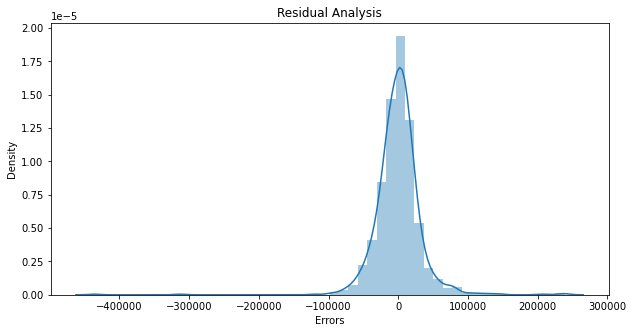


 ------------------------------------------------------------
====>  [Linear Regression] Regplot on Residual Data
------------------------------------------------------------




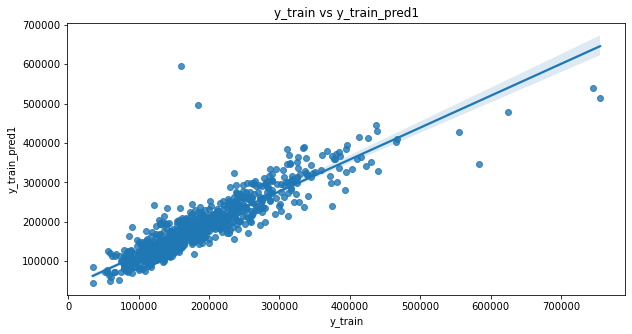

In [38]:
## Residual Analysis

fn_write_msg("[Linear Regression] Residual Analysis on Training Set")

plt.figure(figsize=(10, 5))
sns.distplot(y_train - y_pred_train1)
plt.xlabel('Errors')  
plt.title('Residual Analysis')
plt.show()

fn_write_msg("[Linear Regression] Regplot on Residual Data")

plt.figure(figsize=(10, 5))
sns.regplot(y_train, y_pred_train1)
plt.title('y_train vs y_train_pred1')
plt.xlabel('y_train')  
plt.ylabel('y_train_pred1')
plt.show()


 ------------------------------------------------------------
====>  [Linear Regression] Residual Analysis on Test Set
------------------------------------------------------------




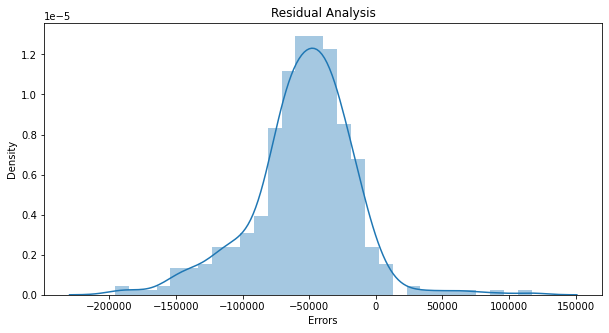


 ------------------------------------------------------------
====>  Regplot on Residual Data
------------------------------------------------------------




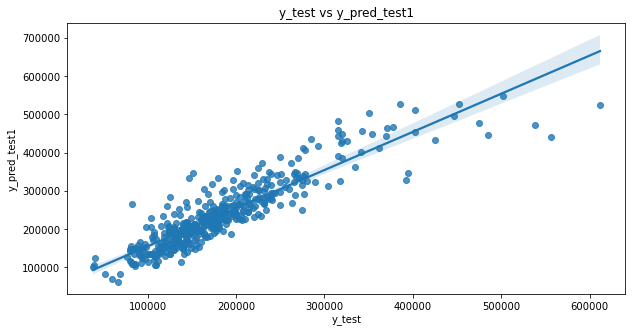

In [39]:
## Residual Analysis

fn_write_msg("[Linear Regression] Residual Analysis on Test Set")

plt.figure(figsize=(10, 5))
sns.distplot(y_test - y_pred_test1)
plt.xlabel('Errors')  
plt.title('Residual Analysis')
plt.show()

fn_write_msg("Regplot on Residual Data")

plt.figure(figsize=(10, 5))
sns.regplot(y_test, y_pred_test1)
plt.title('y_test vs y_pred_test1')
plt.xlabel('y_test')  
plt.ylabel('y_pred_test1')
plt.show()

## MODEL BUILDING [RIDGE REGRESSION]

In [40]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 700, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv1 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 300, 400, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
# Printing the best hyperparameter alpha
alpha1 = model_cv1.best_params_['alpha']
print(f"Best hyperparameter alpha value: {alpha1}" )

# Fit Ridge Model
ridge = Ridge(alpha=alpha1)
ridge.fit(X_train, y_train)


Best hyperparameter alpha value: 10.0


Ridge(alpha=10.0)

In [42]:
fn_write_msg("Printing Ridge Model Coefficients")
print(ridge.coef_)


 ------------------------------------------------------------
====>  Printing Ridge Model Coefficients
------------------------------------------------------------


[ 1.61590636e+03  1.40506960e+04  8.93239647e+03  1.40503931e+04
  1.64274864e+04  1.21671785e+04  7.11878874e+03  1.02459419e+04
  1.68738413e+04  2.74704256e+04  2.96071309e+04  3.44149988e+04
 -1.56964982e+02  1.19934339e+04  1.20675026e+04  4.70220415e+03
  1.29483234e+03  6.38200193e+03 -7.85850098e+03 -9.22490918e+02
  2.56971256e+03  1.99506304e+03 -2.20411406e+03  4.00428116e+03
  5.95775213e+02 -2.59020646e+03 -4.17559371e+03 -6.01419865e+03
 -8.35188814e+03 -7.36031456e+03 -3.56278576e+03 -4.73077699e+03
  5.20073863e+03  4.86323686e+03  6.96741458e+03  1.88188947e+03
  4.34709055e+03 -1.53383115e+03 -2.04945327e+02  6.09704330e+03
  7.52716081e+03  9.63856629e+03  9.15363251e+03 -8.01445067e+03
 -1.23196187e+03 -2.34773135e+03  6.69459263e+03  2.72101870e+03
 -1.23516886e+03 -2.16145374e+03  1.68542572e+02  3.7

In [43]:
fn_write_msg("Predict and evaluate Ridge Regression model performance")

X_test_sc = scaler.fit_transform(X_test)

y_pred_train2 = ridge.predict(X_train)
y_pred_test2 = ridge.predict(X_test_sc)

print(f"====> Training Data R2_Score: {r2_score(y_train, y_pred_train2)}")
print(f"====> Training Data RSS: {np.sum(np.square(y_train - y_pred_train2))}")
print(f"====> Training Data MSE: {mean_squared_error(y_train, y_pred_train2)}")
print(f"====> Training Data RMSE: {mean_squared_error(y_train, y_pred_train2)**0.5}")
print("")
print(f"====> Test Data R2_Score: {r2_score(y_test, y_pred_test2)}")
print(f"====> Test Data RSS: {np.sum(np.square(y_test - y_pred_test2))}")
print(f"====> Test Data MSE: {mean_squared_error(y_test, y_pred_test2)}")
print(f"====> Test Data RMSE: {mean_squared_error(y_test, y_pred_test2)**0.5}")


 ------------------------------------------------------------
====>  Predict and evaluate Ridge Regression model performance
------------------------------------------------------------


====> Training Data R2_Score: 0.8963204096948155
====> Training Data RSS: 661548237390.5647
====> Training Data MSE: 647941466.59213
====> Training Data RMSE: 25454.694392039553

====> Test Data R2_Score: 0.8134040877947518
====> Test Data RSS: 525960235845.0811
====> Test Data MSE: 1200822456.2673085
====> Test Data RMSE: 34652.88525169742


In [44]:
ridge_results = pd.DataFrame(model_cv1.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=10]
ridge_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012999,0.002282,0.003798,1.602711e-03,0.0001,{'alpha': 0.0001},-22089.160198,-22372.364399,-23808.574084,-21788.041776,...,-22620.810283,725.172254,26,-14629.526222,-12180.741543,-13207.665873,-14799.075207,-14086.458407,-13780.693451,973.582805
1,0.009401,0.001026,0.002998,6.324895e-04,0.001,{'alpha': 0.001},-22066.785937,-22312.958850,-23796.315058,-21758.108006,...,-22593.533178,734.080807,25,-14628.327386,-12170.965269,-13203.505737,-14793.784231,-14085.841171,-13776.484759,975.933733
2,0.011112,0.001292,0.003520,6.642160e-04,0.01,{'alpha': 0.01},-21908.331518,-21982.008905,-23672.711018,-21551.971656,...,-22409.741560,779.710810,24,-14623.230208,-12138.586061,-13182.585786,-14760.973725,-14089.098743,-13758.894905,981.611430
3,0.008397,0.000485,0.002996,2.207916e-06,0.05,{'alpha': 0.05},-21578.046828,-21504.819905,-23298.048906,-21114.743152,...,-22018.913666,806.072262,22,-14623.047296,-12183.553826,-13157.978946,-14716.947551,-14113.172501,-13758.940024,962.594030
4,0.010199,0.001719,0.003198,4.006880e-04,0.1,{'alpha': 0.1},-21329.495016,-21222.837176,-22982.681870,-20772.479070,...,-21726.838176,807.424893,21,-14633.033685,-12222.625106,-13152.685294,-14699.625944,-14141.565471,-13769.907100,951.056139
5,0.008602,0.000799,0.003197,4.008065e-04,0.2,{'alpha': 0.2},-20983.751907,-20911.061126,-22536.808519,-20333.751779,...,-21345.841209,793.067971,20,-14678.111505,-12277.547801,-13172.584858,-14712.767634,-14206.199857,-13809.442331,946.603144
6,0.008402,0.000490,0.003196,4.011648e-04,0.3,{'alpha': 0.3},-20720.620002,-20709.414582,-22211.005190,-20060.994317,...,-21080.483823,770.572419,19,-14724.960724,-12325.593759,-13202.786776,-14741.803829,-14262.182592,-13851.465536,945.880905
7,0.009109,0.001297,0.002800,4.002135e-04,0.4,{'alpha': 0.4},-20497.895741,-20553.285752,-21963.585421,-19856.003775,...,-20873.271426,755.538456,18,-14769.531754,-12373.706994,-13244.317230,-14775.472771,-14313.393531,-13895.284456,943.696064
8,0.010047,0.000677,0.002978,6.330226e-04,0.5,{'alpha': 0.5},-20292.116545,-20423.855785,-21769.762018,-19700.561340,...,-20702.746409,745.591258,16,-14815.788104,-12424.227716,-13287.692564,-14808.500002,-14363.049255,-13939.851528,940.567725
9,0.009697,0.001322,0.003601,8.119887e-04,0.6,{'alpha': 0.6},-20115.236351,-20323.079901,-21609.224934,-19573.721392,...,-20561.732172,737.723240,15,-14860.198829,-12475.690166,-13327.622911,-14844.182655,-14409.146846,-13983.368281,937.466359


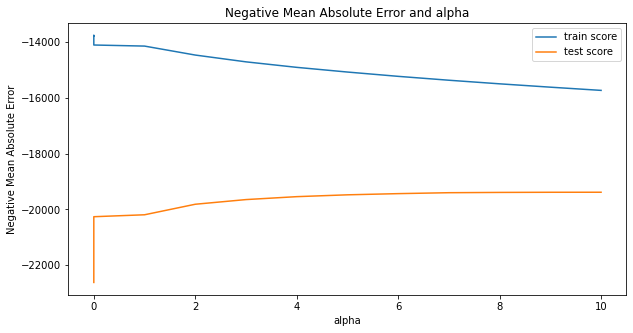

In [45]:
# plotting mean test and train scores with alpha 
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')
plt.figure(figsize=(10,5))

# plotting
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


 ------------------------------------------------------------
====>  [Ridge Regression] Residual Analysis on Training Set
------------------------------------------------------------




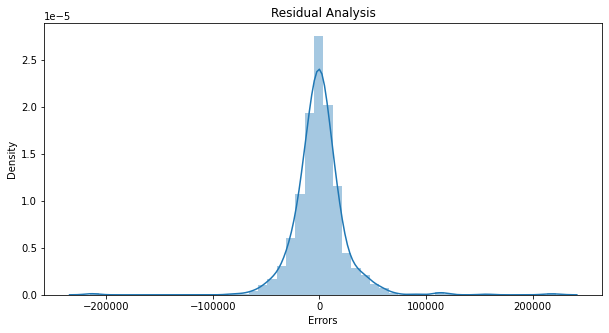


 ------------------------------------------------------------
====>  [Ridge Regression] Regplot on Residual Data
------------------------------------------------------------




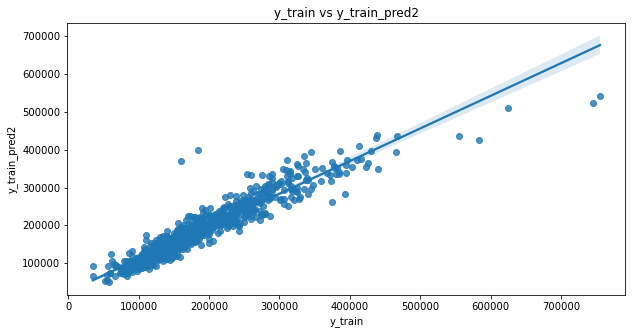

In [46]:
## Residual Analysis

fn_write_msg("[Ridge Regression] Residual Analysis on Training Set")

plt.figure(figsize=(10, 5))
sns.distplot(y_train - y_pred_train2)
plt.xlabel('Errors')  
plt.title('Residual Analysis')
plt.show()

fn_write_msg("[Ridge Regression] Regplot on Residual Data")

plt.figure(figsize=(10, 5))
sns.regplot(y_train, y_pred_train2)
plt.title('y_train vs y_train_pred2')
plt.xlabel('y_train')  
plt.ylabel('y_train_pred2')
plt.show()


 ------------------------------------------------------------
====>  [Ridge Regression] Residual Analysis on Test Set
------------------------------------------------------------




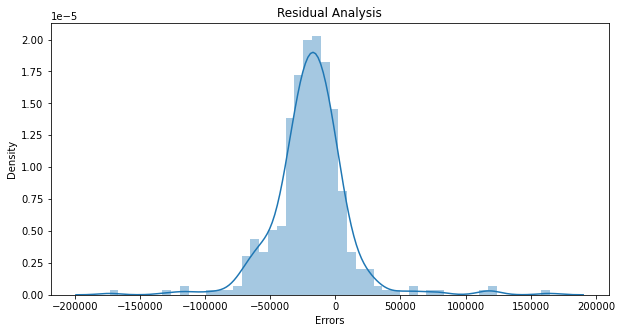


 ------------------------------------------------------------
====>  [Ridge Regression] Regplot on Residual Data
------------------------------------------------------------




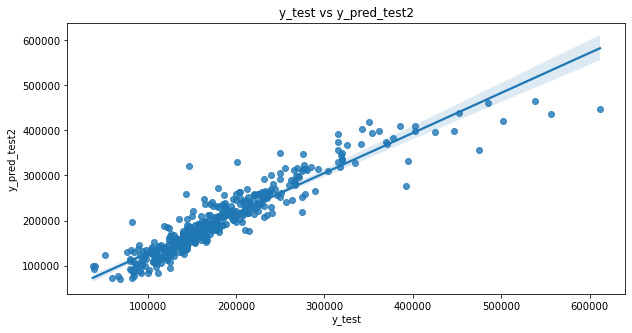

In [47]:
## Residual Analysis

fn_write_msg("[Ridge Regression] Residual Analysis on Test Set")

plt.figure(figsize=(10, 5))
sns.distplot(y_test - y_pred_test2)
plt.xlabel('Errors')  
plt.title('Residual Analysis')
plt.show()

fn_write_msg("[Ridge Regression] Regplot on Residual Data")

plt.figure(figsize=(10, 5))
sns.regplot(y_test, y_pred_test2)
plt.title('y_test vs y_pred_test2')
plt.xlabel('y_test')  
plt.ylabel('y_pred_test2')
plt.show()

## MODEL BUILDING [LASSO REGRESSION]

In [48]:
lasso = Lasso()

# cross validation
folds = 5
model_cv2 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 300, 400, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
alpha2 =model_cv2.best_params_['alpha']
print(f"====> Best hyperparameter alpha value: {alpha2}" )

#Fit Ridge model 

lasso = Lasso(alpha=alpha2)        
lasso.fit(X_train, y_train) 

====> Best hyperparameter alpha value: 100


Lasso(alpha=100)

In [50]:
lasso.coef_

array([-0.00000000e+00,  3.05173401e+04,  1.39230667e+04,  1.26274300e+04,
        4.80449698e+03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.03522552e+03,  2.00972237e+05,
        0.00000000e+00,  0.00000000e+00,  9.08826680e+03,  0.00000000e+00,
        0.00000000e+00,  5.01130825e+03, -6.54375528e+03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -3.71885755e+03,
       -2.35826962e+03, -0.00000000e+00, -0.00000000e+00, -2.62322951e+03,
        0.00000000e+00,  0.00000000e+00,  5.54322471e+03, -0.00000000e+00,
        3.13809643e+03, -0.00000000e+00,  0.00000000e+00,  4.57607337e+03,
        9.89023073e+03,  1.13134665e+04,  9.06630591e+03, -3.15801581e+03,
        0.00000000e+00, -0.00000000e+00,  5.59784150e+03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  3.02582625e+03,
        0.00000000e+00,  

In [51]:
fn_write_msg("Predict and evaluate Lasso Regression model performance")

y_pred_train3 = lasso.predict(X_train)
y_pred_test3 = lasso.predict(X_test_sc)

print(f"====> Training Data R2_Score: {r2_score(y_train, y_pred_train3)}")
print(f"====> Training Data RSS: {np.sum(np.square(y_train - y_pred_train3))}")
print(f"====> Training Data MSE: {mean_squared_error(y_train, y_pred_train3)}")
print(f"====> Training Data RMSE: {mean_squared_error(y_train, y_pred_train3)**0.5}")
print("")
print(f"====> Test Data R2_Score: {r2_score(y_test, y_pred_test3)}")
print(f"====> Test Data RSS: {np.sum(np.square(y_test - y_pred_test3))}")
print(f"====> Test Data MSE: {mean_squared_error(y_test, y_pred_test3)}")
print(f"====> Test Data RMSE: {mean_squared_error(y_test, y_pred_test3)**0.5}")



 ------------------------------------------------------------
====>  Predict and evaluate Lasso Regression model performance
------------------------------------------------------------


====> Training Data R2_Score: 0.9014422235238655
====> Training Data RSS: 628867486040.4008
====> Training Data MSE: 615932895.2403533
====> Training Data RMSE: 24817.99539125498

====> Test Data R2_Score: 0.7088181565792092
====> Test Data RSS: 820757910660.6879
====> Test Data MSE: 1873876508.357735
====> Test Data RMSE: 43288.29528126206


In [52]:
# Lasso cv results
lasso_results = pd.DataFrame(model_cv2.cv_results_)
lasso_results = lasso_results[lasso_results['param_alpha']<=100]
lasso_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.118615,0.009201,0.003601,7.998595e-04,0.0001,{'alpha': 0.0001},-22017.555107,-22252.936297,-23737.647092,-21773.667489,...,-22647.950706,795.152719,31,-14630.458795,-12161.528229,-13204.671691,-14795.182773,-14086.508142,-13775.669926,979.610459
1,0.116670,0.004909,0.003719,3.923549e-04,0.001,{'alpha': 0.001},-22017.416562,-22252.358753,-23737.443930,-21772.650385,...,-22645.867242,793.677319,30,-14630.442980,-12161.497396,-13204.641955,-14795.130039,-14086.505350,-13775.643544,979.610173
2,0.114433,0.007838,0.003394,4.849403e-04,0.01,{'alpha': 0.01},-22015.814010,-22246.583612,-23735.404853,-21762.396591,...,-22630.402224,784.760463,29,-14630.347587,-12161.251610,-13204.460609,-14794.632344,-14086.603022,-13775.459034,979.598292
3,0.113419,0.003249,0.003399,4.885206e-04,0.05,{'alpha': 0.05},-22008.725613,-22220.404192,-23725.678870,-21719.206215,...,-22567.885541,755.140245,28,-14630.046277,-12160.312172,-13203.687334,-14792.734523,-14087.036539,-13774.763369,979.578395
4,0.119505,0.008050,0.002977,4.230795e-05,0.1,{'alpha': 0.1},-21999.368652,-22187.595671,-23713.062276,-21686.542067,...,-22529.079370,746.930116,27,-14629.596478,-12159.335710,-13202.717347,-14790.643188,-14087.510717,-13773.960688,979.530735
5,0.113264,0.007935,0.003390,5.160945e-04,0.2,{'alpha': 0.2},-21979.880882,-22130.009184,-23686.175203,-21635.798439,...,-22493.071821,754.407104,26,-14628.769586,-12157.844271,-13200.395028,-14786.110045,-14088.038890,-13772.231564,979.243032
6,0.111627,0.006790,0.003198,3.929276e-04,0.3,{'alpha': 0.3},-21957.948579,-22095.179118,-23656.997320,-21592.123334,...,-22462.749749,758.324110,25,-14626.900541,-12154.882271,-13197.833439,-14781.400938,-14089.187656,-13770.040969,979.292704
7,0.115766,0.005432,0.003398,4.898060e-04,0.4,{'alpha': 0.4},-21938.497690,-22060.281316,-23628.510958,-21554.016809,...,-22432.878527,759.987373,24,-14625.773080,-12152.900853,-13195.678231,-14776.565261,-14090.267851,-13768.237055,979.074286
8,0.114744,0.004985,0.003399,4.896923e-04,0.5,{'alpha': 0.5},-21917.821869,-22026.533925,-23598.506752,-21513.927731,...,-22400.672374,760.559453,23,-14624.718948,-12151.420975,-13193.835554,-14772.075234,-14091.721865,-13766.754515,978.766068
9,0.120154,0.009254,0.003800,4.013329e-04,0.6,{'alpha': 0.6},-21897.402659,-21992.777328,-23569.242032,-21475.739621,...,-22369.084370,760.973740,22,-14623.903661,-12150.688120,-13191.983010,-14767.903780,-14093.038976,-13765.503509,978.313969


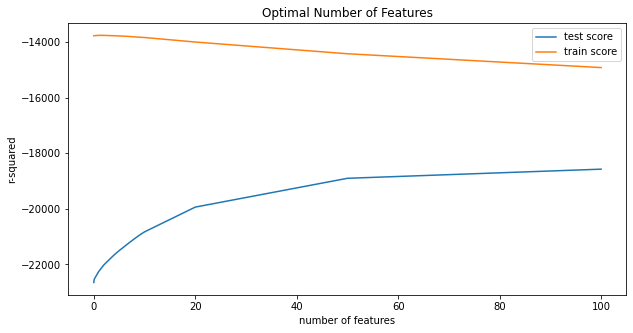

In [53]:
# plotting cv results
plt.figure(figsize=(10,5))

plt.plot(lasso_results["param_alpha"], lasso_results["mean_test_score"])
plt.plot(lasso_results["param_alpha"], lasso_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')
plt.show()


 ------------------------------------------------------------
====>  [Lasso Regression] Residual Analysis on Training Set
------------------------------------------------------------




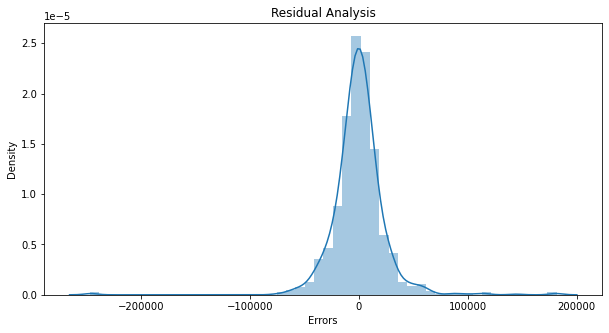


 ------------------------------------------------------------
====>  [Lasso Regression]Regplot on Residual Data
------------------------------------------------------------




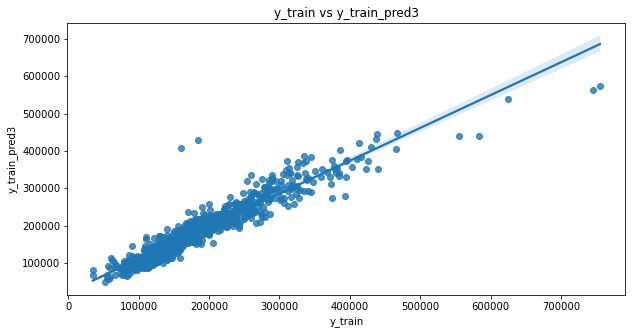

In [54]:
## Residual Analysis

fn_write_msg("[Lasso Regression] Residual Analysis on Training Set")

plt.figure(figsize=(10, 5))
sns.distplot(y_train - y_pred_train3)
plt.xlabel('Errors')  
plt.title('Residual Analysis')
plt.show()

fn_write_msg("[Lasso Regression]Regplot on Residual Data")

plt.figure(figsize=(10, 5))
sns.regplot(y_train, y_pred_train3)
plt.title('y_train vs y_train_pred3')
plt.xlabel('y_train')  
plt.ylabel('y_train_pred3')
plt.show()


 ------------------------------------------------------------
====>  [Lasso Regression] Residual Analysis on Test Set
------------------------------------------------------------




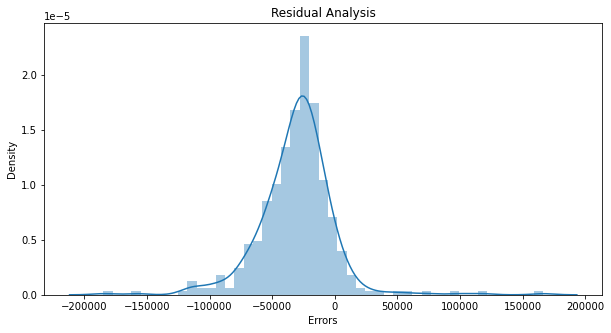


 ------------------------------------------------------------
====>  [Lasso Regression] Regplot on Residual Data
------------------------------------------------------------




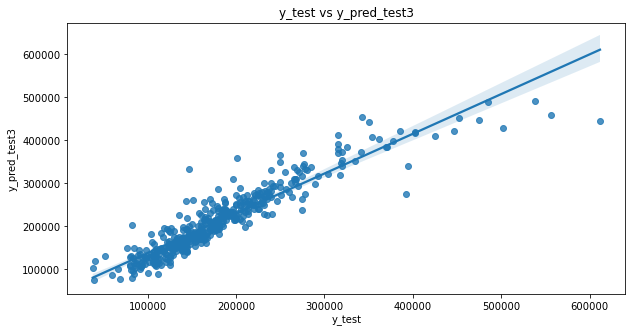

In [55]:
## Residual Analysis

fn_write_msg("[Lasso Regression] Residual Analysis on Test Set")

plt.figure(figsize=(10, 5))
sns.distplot(y_test - y_pred_test3)
plt.xlabel('Errors')  
plt.title('Residual Analysis')
plt.show()

fn_write_msg("[Lasso Regression] Regplot on Residual Data")

plt.figure(figsize=(10, 5))
sns.regplot(y_test, y_pred_test3)
plt.title('y_test vs y_pred_test3')
plt.xlabel('y_test')  
plt.ylabel('y_pred_test3')
plt.show()

## Top Predictor Variables (All Models)

In [56]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

# betas['Linear'] = model_5.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [57]:
pd.DataFrame(abs(betas.Ridge).sort_values(ascending=False)).reset_index()['index'].head(10)

0               GrLivArea
1              FullBath_3
2          OverallQual_10
3    Neighborhood_NoRidge
4         TotRmsAbvGrd_10
5           OverallQual_9
6                2ndFlrSF
7                1stFlrSF
8            Fireplaces_2
9             BsmtQual_TA
Name: index, dtype: object

In [58]:
pd.DataFrame(abs(betas.Lasso).sort_values(ascending=False)).reset_index()['index'].head(10)

0               GrLivArea
1          OverallQual_10
2           OverallQual_9
3              FullBath_3
4    Neighborhood_NoRidge
5         TotRmsAbvGrd_11
6                 LotArea
7           OverallQual_8
8            Fireplaces_3
9    Neighborhood_NridgHt
Name: index, dtype: object

In [59]:
X_train

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.157534,0.019306,0.384058,0.000000,0.00000,0.082920,0.0,0.169521,0.141408,0.113889,...,0,0,0,0,1,0,0,0,1,0
318,0.236301,0.039403,0.876812,0.716667,0.16000,0.174876,0.0,0.154110,0.220458,0.231481,...,0,0,0,0,1,0,0,0,1,0
239,0.106164,0.033981,0.528986,0.000000,0.00000,0.016655,0.0,0.274401,0.120295,0.098611,...,0,0,0,0,1,0,0,0,1,0
986,0.130137,0.017931,0.275362,0.883333,0.00000,0.000000,0.0,0.207620,0.079378,0.145602,...,0,0,0,0,1,0,0,0,1,0
1416,0.133562,0.046139,0.094203,0.000000,0.00000,0.000000,0.0,0.332620,0.127169,0.202315,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.133562,0.021158,0.391304,0.000000,0.00000,0.000000,0.0,0.431507,0.164975,0.147222,...,0,0,0,0,1,0,0,0,1,0
802,0.143836,0.031445,0.963768,0.916667,0.00000,0.114812,0.0,0.034247,0.119149,0.082407,...,0,0,0,0,1,0,0,0,1,0
53,0.160959,0.228257,0.789855,0.616667,0.00000,0.320695,0.0,0.013699,0.301473,0.340278,...,0,0,0,0,1,0,0,0,1,0
350,0.160959,0.029672,0.978261,0.950000,0.22625,0.000000,0.0,0.800086,0.305892,0.346528,...,0,0,1,0,0,0,0,0,0,1


## Summary/Comparison of different Models
<hr>

<b> FOR ALL MODELS </b>
<font color = blue >
    <ul></br>
        <li>  Error Distribution is normally distributed across 0
        <li>  Residual points are equal distributed across predicted value
        <li>  All models performed better on the training data as compared to the test data
    </ul>
</font>
</hr>

<b> LINEAR REGRESSION SUMMARY </b>

<font color = blue >
    <ul></br>
        <li>  All P-Values < 0.05 (~0) and VIF Values < 5 post RFE
        <li>  Training data R-squared = 0.810
        <li>  Test data R-squared = 0.310
        <li>  R-squared value is quite low for training data compared to the test data
    </ul>
</font>
</hr>

<b> RIDGE REGRESSION SUMMARY </b>

<font color = blue >
    <ul></br>
        <li>  Best hyperparameter alpha value: 10
        <li>  Training data R-squared = 0.896
        <li>  Test data R-squared = 0.813
        <li>  R-squared value is quite low for training data compared to the test data
    </ul>
</font>
</hr>

<b> LASSO REGRESSION SUMMARY </b>

<font color = blue >
    <ul></br>
        <li>  Best hyperparameter alpha value: 100
        <li>  Training data R-squared = 0.901
        <li>  Test data R-squared = 0.708
        <li>  R-squared value is quite low for training data compared to the test data
    </ul>
</font>
</hr>

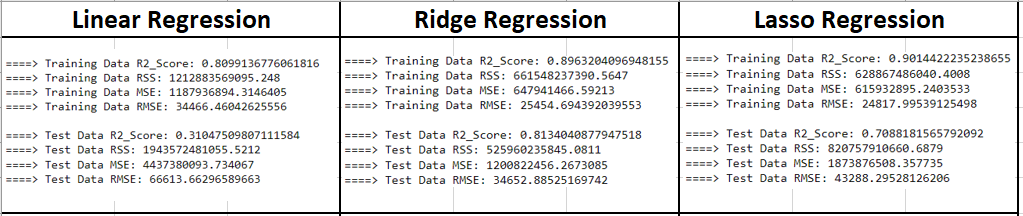

## Code related Part 2 Questions 

#### Ridge/Lasso Regression for Alpha and 2 * Alpha

In [60]:
print(f"Fit Ridge Model with double the alpha value: {alpha1 * 2}" )

# Fit Ridge Model
ridge2 = Ridge(alpha=alpha1 * 2)
ridge2.fit(X_train, y_train)

Fit Ridge Model with double the alpha value: 20.0


Ridge(alpha=20.0)

In [61]:
fn_write_msg("Predict and evaluate Ridge Regression model performance with 2 * ALPHA")

y_pred_train4 = ridge2.predict(X_train)
y_pred_test4 = ridge2.predict(X_test_sc)

print(f"====> Training Data R2_Score: {r2_score(y_train, y_pred_train4)}")
print(f"====> Training Data RSS: {np.sum(np.square(y_train - y_pred_train4))}")
print(f"====> Training Data MSE: {mean_squared_error(y_train, y_pred_train4)}")
print(f"====> Training Data RMSE: {mean_squared_error(y_train, y_pred_train4)**0.5}")
print("")
print(f"====> Test Data R2_Score: {r2_score(y_test, y_pred_test4)}")
print(f"====> Test Data RSS: {np.sum(np.square(y_test - y_pred_test4))}")
print(f"====> Test Data MSE: {mean_squared_error(y_test, y_pred_test4)}")
print(f"====> Test Data RMSE: {mean_squared_error(y_test, y_pred_test4)**0.5}")


 ------------------------------------------------------------
====>  Predict and evaluate Ridge Regression model performance with 2 * ALPHA
------------------------------------------------------------


====> Training Data R2_Score: 0.8833898992702419
====> Training Data RSS: 744053929733.2673
====> Training Data MSE: 728750176.0365008
====> Training Data RMSE: 26995.3732338803

====> Test Data R2_Score: 0.8316636644530772
====> Test Data RSS: 474491738319.36743
====> Test Data MSE: 1083314471.048784
====> Test Data RMSE: 32913.74289030016


In [62]:
print(f"Fit Lasso Model with double the alpha value: {alpha2 * 2}" )

# Fit Lasso Model
lasso2 = Lasso(alpha=alpha2 * 2)        
lasso2.fit(X_train, y_train) 

Fit Lasso Model with double the alpha value: 200


Lasso(alpha=200)

In [63]:
fn_write_msg("Predict and evaluate Lasso Regression model performance with 2 * ALPHA")

y_pred_train5 = lasso2.predict(X_train)
y_pred_test5 = lasso2.predict(X_test_sc)

print(f"====> Training Data R2_Score: {r2_score(y_train, y_pred_train5)}")
print(f"====> Training Data RSS: {np.sum(np.square(y_train - y_pred_train5))}")
print(f"====> Training Data MSE: {mean_squared_error(y_train, y_pred_train5)}")
print(f"====> Training Data RMSE: {mean_squared_error(y_train, y_pred_train5)**0.5}")
print("")
print(f"====> Test Data R2_Score: {r2_score(y_test, y_pred_test5)}")
print(f"====> Test Data RSS: {np.sum(np.square(y_test - y_pred_test5))}")
print(f"====> Test Data MSE: {mean_squared_error(y_test, y_pred_test5)}")
print(f"====> Test Data RMSE: {mean_squared_error(y_test, y_pred_test5)**0.5}")


 ------------------------------------------------------------
====>  Predict and evaluate Lasso Regression model performance with 2 * ALPHA
------------------------------------------------------------


====> Training Data R2_Score: 0.886445309798838
====> Training Data RSS: 724558275441.545
====> Training Data MSE: 709655509.7370666
====> Training Data RMSE: 26639.360160053893

====> Test Data R2_Score: 0.7501527648704087
====> Test Data RSS: 704247532333.1614
====> Test Data MSE: 1607871078.3862133
====> Test Data RMSE: 40098.26777288781


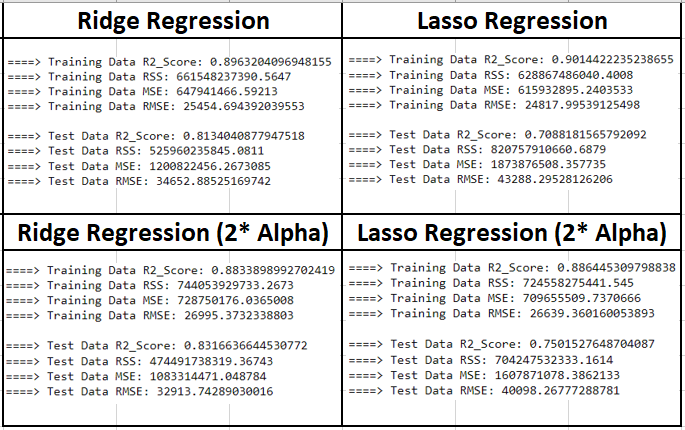

In [64]:
betas2 = pd.DataFrame(index=X_train.columns)
betas2.rows = X_train.columns

# betas['Linear'] = model_5.coef_
betas2['Ridge'] = ridge2.coef_
betas2['Lasso'] = lasso2.coef_

In [65]:
pd.DataFrame(abs(betas2.Ridge).sort_values(ascending=False)).reset_index()['index'].head(10)

0              FullBath_3
1         TotRmsAbvGrd_10
2          OverallQual_10
3               GrLivArea
4    Neighborhood_NoRidge
5            Fireplaces_2
6           OverallQual_9
7                1stFlrSF
8                2ndFlrSF
9         BsmtExposure_Gd
Name: index, dtype: object

In [66]:
pd.DataFrame(abs(betas2.Lasso).sort_values(ascending=False)).reset_index()['index'].head(10)

0               GrLivArea
1          OverallQual_10
2           OverallQual_9
3              FullBath_3
4    Neighborhood_NoRidge
5           OverallQual_8
6            Fireplaces_2
7            GarageCars_3
8         TotRmsAbvGrd_10
9    Neighborhood_NridgHt
Name: index, dtype: object

#### Top Lasso Model predictors post removal of the top 5 predictors as determined earlier

In [67]:
drop_lasso_cols = ['GrLivArea', 'OverallQual_10', 'OverallQual_9', 'FullBath_3', 'Neighborhood_NoRidge']

X_train_lasso_1 = X_train.drop(columns=drop_lasso_cols)
# Fit Lasso Model
lasso3 = Lasso(alpha=alpha2)        
lasso3.fit(X_train_lasso_1, y_train) 

betas3 = pd.DataFrame(index=X_train_lasso_1.columns)
betas3.rows = X_train_lasso_1.columns

betas3['Lasso'] = lasso3.coef_
pd.DataFrame(abs(betas3.Lasso).sort_values(ascending=False)).reset_index()['index'].head(10)

0           1stFlrSF
1           2ndFlrSF
2            LotArea
3    TotRmsAbvGrd_11
4       Fireplaces_3
5      OverallQual_5
6      OverallQual_4
7      OverallQual_6
8       GarageCars_3
9    TotRmsAbvGrd_10
Name: index, dtype: object